- Classificação (previsões categóricas). Ex: NaiveBayes, OneR, Redes Neurais Artificiais, SVMs, Árvores de Decisão e muitos outros.
- Regressão (previsões numéricas)
- Agrupamentos (agrupar dados de acordo com as características em comum e sem supervisão). Ex: K-means e DBSCAN
- Regras de Associação: busca relações entre elementos (considera o histórico para verificar combinações, como ofertar um determinado produto com base no histórico de consumo. Por exemplo, pelo histórico sabe-se que quem consome o produto A costuma também consumir o produto B, assim seria interessante oferecer a quem está comprando A também o produto B. Outro exemplo, identificar sintomas relacionados a determinada doença). Ex. Apriori, FP Growth.


**Métodos para treino e avaliação de performance do modelo:**

- Hold Out (divide o dataset em treino e teste)
- Validação Cruzada: é o mais usado. Consiste em usar vários subconjuntos de treino/teste dos dados. Ao final é calculada uma métrica de desempenho médio (https://dataml.com.br/validacao-cruzada-aninhada-com-scikit-learn/)

**Matriz de Confusão**

Tabela com duas linhas e duas colunas que relata o número de falsos positivos, falsos negativos, verdadeiros positivos e verdadeiros negativos.

**Métricas** (https://iq.opengenus.org/content/images/2021/11/summary.png)

- Acertos (Acurácia) = (VP+VN) / Total

- Erros = (FP+FN) / Total

- Precisão = VP / (VP+FP) (verdadeiros positivos / total de positivos)

- Sensibilidade (Recall) = VP / (VP+FN) (verdadeiros positivos  / total verdadeiros positivos )

- Especificidade = VN / (VN+FP) verdadeiros negativos  / total verdadeiros negativos)

- F1 Score = 2 * ( (precisao * recall) / (precisao + recall) )



**Codificação de características**

- One Hot Enconding
- Dummy Variable

**Redimensionamento de características**

- Normalização (valores variam de 0 a 1)

- Padronização (média 0 e desvio padrão 1)

**Aprendizado baseado em instância**

Nao cria modelo. Ao contrário, busca um registro histórico (instancia0 mais parecido com o que você quer analisar, ou seja, busca vizinhos próximos semelhantes. 
Esses modelos tendem a ter um custo computacional mais alto, principalmente, se a base de dados histórica for grande.
Exemplo: KNN.

### **Clustering** (unsupervised)

#### K-Means
Classificação por agrupamento de forma não supervisionada usando distancias euclidianas. Exige a definição do número de grupos a serem formados. O centroide a partir de onde os grupos são formados é uma média.
O K-Medoide é parecido, mas permite a você especificar o centroide também.

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
from sklearn import datasets
from scipy import stats
import numpy as np

iris_df = datasets.load_iris()
unique_data, unique_data_total = np.unique(iris_df.target, return_counts=True)
print(unique_data, unique_data_total)
features_iris = iris_df.data
target_iris = iris_df.target

[0 1 2] [50 50 50]


In [ ]:
# model training: the ideia is to create n models instead of just one
model = KMeans(n_clusters=3) # number of random trees
model.fit(features_iris)

# see each cluster centroid
centroids = model.cluster_centers_
print('centroids', centroids)

# predict using the test data (see the label received)
previsions = model.labels_
print('labels', previsions)
unique_data, unique_data_total = np.unique(previsions, return_counts=True)
print('counts', unique_data, unique_data_total)

centroids [[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
counts [0 1 2] [62 50 38]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cf = confusion_matrix(target_iris, previsions)
cf

array([[ 0, 50,  0],
       [48,  0,  2],
       [14,  0, 36]])

In [ ]:
accuracy = accuracy_score(target_iris, previsions)
print(accuracy)

0.8933333333333333


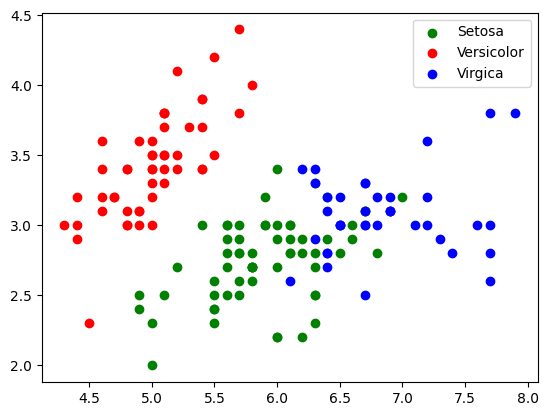

In [ ]:
plt.scatter(iris_df.data[previsions == 0, 0], iris_df.data[previsions == 0, 1], c='green', label='Setosa') # usando colunas 1 e 2 para criar 2 dimensoes
plt.scatter(iris_df.data[previsions == 1, 0], iris_df.data[previsions == 1, 1], c='red', label='Versicolor')
plt.scatter(iris_df.data[previsions == 2, 0], iris_df.data[previsions == 2, 1], c='blue', label='Virgica')
plt.legend()

#### DBSCAN
Classificação por agrupamento por densidade. Não precisa especificar  o número de grupos a serem formados.

#### PCA

#### Hierarchical Clustering

### **Classification** (supervised)

#### Dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB

In [ ]:
df = pd.read_csv('Credit.csv')
df.shape

(1000, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [ ]:
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [ ]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [ ]:
features = df.iloc[:, 0:20] # todas as linhas e as primeiras 19 colunas
target = df.iloc[:, 20] #  todas as linhas da vigessima coluna (class) que indica se o cliente é ou nao um bom pagador
target.value_counts()

good    700
bad     300
Name: class, dtype: int64

In [ ]:
# convert categorical attributes to numeric attributes
features_not_change= [1, 4, 7, 10, 12, 15, 17]
labels_encoders = {}
for i in range (20):
  if i not in features_not_change:
    label_encoder = LabelEncoder()
    labels_encoders[i] = label_encoder
    features.iloc[:,i] = label_encoder.fit_transform(features.iloc[:,i])

<ipython-input-87-77fad2f15d72>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  features.iloc[:,i] = label_encoder.fit_transform(features.iloc[:,i])
<ipython-input-87-77fad2f15d72>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  features.iloc[:,i] = label_encoder.fit_transform(features.iloc[:,i])
<ipython-input-87-77fad2f15d72>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newval

In [ ]:
# split between train and test
# X=  independents variables (features used to train), Y = variable to predict (what we want to predict)
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3, random_state=0)
X_test.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
993,2,36,3,5,3959,3,4,4,3,2,3,0,30,1,1,1,0,1,1,1
859,0,9,3,1,3577,1,0,1,3,1,2,2,26,1,2,1,3,2,0,0
298,0,18,3,5,2515,3,0,3,3,2,4,2,43,1,1,1,3,1,1,1
553,1,12,1,1,1995,1,2,4,3,2,1,3,27,1,1,1,3,1,0,1
672,0,60,3,1,10366,3,3,2,3,2,4,0,42,1,1,1,0,1,1,1


#### Naive Bayes

In [ ]:
# model training
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, Y_train)

GaussianNB()

In [ ]:
# prediction using the model
predictions = naive_bayes.predict(X_test)
predictions[0:20]

array(['bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good'], dtype='<U4')

In [ ]:
# confusion matrix
cf = confusion_matrix(Y_test, predictions)
cf

array([[ 41,  45],
       [ 42, 172]])

In [ ]:
# metrics to evaluate the performance
accuracy = accuracy_score(Y_test, predictions)
accuracy

0.71

In [ ]:
error_rate = 1 - accuracy
error_rate

0.29000000000000004

#### Árvores de Decisão

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz

In [ ]:
# load the dataset before proceeding
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
# can be visualized at 
# http://www.webgraphviz.com/?tab=map
export_graphviz(model, out_file='tree.dot')

In [ ]:
previsions = model.predict(X_test)
previsions[0:20]

array(['bad', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'bad'], dtype=object)

In [ ]:
# confusion matrix
cf = confusion_matrix(Y_test, previsions)
cf

array([[ 39,  47],
       [ 43, 171]])

In [ ]:
# metrics to evaluate the performance
accuracy = accuracy_score(Y_test, previsions)
accuracy

0.7

#### SVM (Support Vector Machine)

In [ ]:
from sklearn.svm import SVC 

# load the dataset before proceeding
model = SVC()
model.fit(X_train, Y_train)

# predict using the test data
previsions = model.predict(X_test)

# confusion matrix
cf = confusion_matrix(Y_test, previsions)
print(cf)

# metrics to evaluate the performance
accuracy = accuracy_score(Y_test, previsions)
print(accuracy)

[[  5  81]
 [  4 210]]
0.7166666666666667


#### ExtraTreeClassifier (For Best Features Selection)

In [ ]:
from sklearn.tree import ExtraTreeClassifier # find the most important features

model = ExtraTreeClassifier()
model.fit(X_train, Y_train)

# scores for each feature. We can see that the best are 0, 1, 2 and 3.
feature_importance = model.feature_importances_
feature_importance

array([1.])

In [ ]:
# Let's try again using the best features to see if the performance will be improved
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3, random_state=0)
X_train = X_train.iloc[:,[0,1]]
X_test = X_test.iloc[:,[0,1]]

# load the dataset before proceeding
model = SVC()
model.fit(X_train, Y_train)

# predict using the test data
previsions = model.predict(X_test)

# confusion matrix
cf = confusion_matrix(Y_test, previsions)
print(cf)

# metrics to evaluate the performance
accuracy = accuracy_score(Y_test, previsions)
print(accuracy)

[[ 12  74]
 [ 12 202]]
0.7133333333333334


#### Random Forest

In [ ]:
# A random forest is a meta estimator that fits a number of decision tree classifiers on 
# various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 
# The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), 
# otherwise the whole dataset is used to build each tree.
from sklearn.ensemble import RandomForestClassifier 

# load the dataset before proceeding
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3, random_state=0)

# model training: the ideia is to create n models instead of just one
model = RandomForestClassifier(n_estimators=1000) # number of random trees
model.fit(X_train, Y_train)

# predict using the test data
previsions = model.predict(X_test)

cf = confusion_matrix(Y_test, previsions)
print(cf)

accuracy = accuracy_score(Y_test, previsions)
print(accuracy)

[[ 39  47]
 [ 17 197]]
0.7866666666666666


#### KNN (K-nearest neighbors)

KNN modeling does not include training period as the data itself is a model which will be the reference for future prediction (Does not work well with large dataset as calculating distances between each data instance would be very costly).

https://medium.com/@anuuz.soni/advantages-and-disadvantages-of-knn-ee06599b9336

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from scipy import stats

iris_df = pd.read_csv('iris.csv')
iris_df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
other_iris_df = datasets.load_iris()
stats.describe(other_iris_df.data)

DescribeResult(nobs=150, minmax=(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5])), mean=array([5.84333333, 3.05733333, 3.758     , 1.19933333]), variance=array([0.68569351, 0.18997942, 3.11627785, 0.58100626]), skewness=array([ 0.31175306,  0.31576711, -0.27212767, -0.10193421]), kurtosis=array([-0.57356795,  0.18097632, -1.39553589, -1.33606741]))

In [ ]:
other_iris_df.data[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [ ]:
features_other_iris_df = other_iris_df.data
target_other_iris_df = other_iris_df.target
X_train_features_other_iris_df, X_test_features_other_iris_df, Y_train_features_other_iris_df, Y_test_features_other_iris_df = train_test_split(features_other_iris_df, 
                                                                                                                                                target_other_iris_df, 
                                                                                                                                                test_size=0.3, 
                                                                                                                                                random_state=0)

In [ ]:
# load the dataset before proceeding
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_features_other_iris_df, 
          Y_train_features_other_iris_df)

# predict using the test data
predictions__other_iris_df = model.predict(X_test_features_other_iris_df)

# confusion matrix
cf = confusion_matrix(Y_test_features_other_iris_df, predictions__other_iris_df)
print(cf)

# metrics to evaluate the performance
accuracy = accuracy_score(Y_test_features_other_iris_df, predictions__other_iris_df)
print(accuracy)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
0.9777777777777777


### Regras de Associação

As regras são avaliadas através de métricas, sendo que as principais são:

- **Suporte**: número de registros que contém todos os elementos de interesse (A e B) em relação ao total de registros, ou seja,  registros com A e B / total de registros
- **Confiança**: proporção de registros que tem o elementos A e o B (apareceram juntos), ou seja, registros com A e B/ registros com apenas A
- **Lift**: quanto aumenta a frequência de B quando A está presente, ou seja, é a confiança dividida pelo suporte

#### A Priori
https://www.youtube.com/watch?v=sbqtg6GyZCc

https://github.com/higoramario/univesp-com360-mineracao-dados

In [ ]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5976 sha256=49c86b501a87c9f67e9f129ed46016693a3dd070b367e3aae968f4ed0ef9ab91
  Stored in directory: /root/.cache/pip/wheels/32/2a/54/10c595515f385f3726642b10c60bf788029e8f3a1323e3913a
Successfully built apyori


In [ ]:
import pandas as pd
from apyori import apriori
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5,5)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/higoramario/univesp-com360-mineracao-dados/main/market-basket-optimisation.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# cleaning data to remove trailling spaces
for index in df.columns:
  df[index] = df[index].str.strip()

In [ ]:
df.melt()

,variable,value
0,0,shrimp
1,0,burgers
2,0,chutney
3,0,turkey
4,0,mineral water
...,...,...
150015,19,NaN
150016,19,NaN
150017,19,NaN
150018,19,NaN


In [ ]:
items = df.melt()['value'].dropna().sort_values()
print(f'Existem {items.nunique()} produtos unicos', items.unique())

Existem 119 produtos unicos ['almonds' 'antioxydant juice' 'asparagus' 'avocado' 'babies food' 'bacon'
 'barbecue sauce' 'black tea' 'blueberries' 'body spray' 'bramble'
 'brownies' 'bug spray' 'burger sauce' 'burgers' 'butter' 'cake'
 'candy bars' 'carrots' 'cauliflower' 'cereals' 'champagne' 'chicken'
 'chili' 'chocolate' 'chocolate bread' 'chutney' 'cider'
 'clothes accessories' 'cookies' 'cooking oil' 'corn' 'cottage cheese'
 'cream' 'dessert wine' 'eggplant' 'eggs' 'energy bar' 'energy drink'
 'escalope' 'extra dark chocolate' 'flax seed' 'french fries'
 'french wine' 'fresh bread' 'fresh tuna' 'fromage blanc'
 'frozen smoothie' 'frozen vegetables' 'gluten free bar' 'grated cheese'
 'green beans' 'green grapes' 'green tea' 'ground beef' 'gums' 'ham'
 'hand protein bar' 'herb & pepper' 'honey' 'hot dogs' 'ketchup'
 'light cream' 'light mayo' 'low fat yogurt' 'magazines' 'mashed potato'
 'mayonnaise' 'meatballs' 'melons' 'milk' 'mineral water' 'mint'
 'mint green tea' 'muffins' 'mus

In [ ]:
# itemns and counts
items.value_counts()

mineral water    1788
eggs             1348
spaghetti        1306
french fries     1282
chocolate        1230
                 ... 
tea                29
bramble            14
cream               7
napkins             5
water spray         3
Name: value, Length: 119, dtype: int64

In [ ]:
# Listing top 10 itemns
items.value_counts().nlargest(10)

mineral water        1788
eggs                 1348
spaghetti            1306
french fries         1282
chocolate            1230
green tea             991
milk                  972
ground beef           737
frozen vegetables     715
pancakes              713
Name: value, dtype: int64

<Axes: >

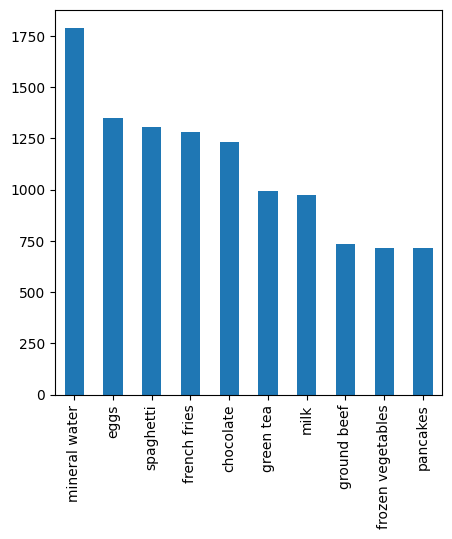

In [ ]:
items.value_counts().nlargest(10).plot(kind='bar')

In [ ]:
# remove lines with one item because for association is necessary a minimum of 2
qtd_by_basket = df.notna().apply(sum, axis=1)
qtd_by_basket

0       20
1        3
2        1
3        2
4        5
        ..
7496     3
7497     6
7498     1
7499     2
7500     4
Length: 7501, dtype: int64

In [ ]:
for _, line in df[qtd_by_basket > 1].iterrows():
  print( _, line)
  break

0 0                shrimp
1               almonds
2               avocado
3        vegetables mix
4          green grapes
5      whole weat flour
6                  yams
7        cottage cheese
8          energy drink
9          tomato juice
10       low fat yogurt
11            green tea
12                honey
13                salad
14        mineral water
15               salmon
16    antioxydant juice
17      frozen smoothie
18              spinach
19            olive oil
Name: 0, dtype: object


In [ ]:
baskets_filtered = [list(set(line.dropna())) for _, line in df[qtd_by_basket > 1].iterrows()]
print('total registers after cleaning:', len(baskets_filtered))
baskets_filtered[:5]

total registers after cleaning: 5747


[['antioxydant juice',
  'salad',
  'mineral water',
  'green tea',
  'olive oil',
  'honey',
  'almonds',
  'yams',
  'cottage cheese',
  'green grapes',
  'shrimp',
  'energy drink',
  'avocado',
  'spinach',
  'whole weat flour',
  'frozen smoothie',
  'vegetables mix',
  'salmon',
  'tomato juice',
  'low fat yogurt'],
 ['burgers', 'eggs', 'meatballs'],
 ['turkey', 'avocado'],
 ['mineral water', 'green tea', 'whole wheat rice', 'energy bar', 'milk'],
 ['french fries', 'whole wheat pasta']]

In [ ]:
rules = apriori(baskets_filtered, 
                min_support=0.05, 
                min_confidence=0.3, 
                min_lenght=2)
rules

<generator object apriori at 0x7f26901620b0>

In [ ]:
associations = list(rules)
associations

[RelationRecord(items=frozenset({'mineral water', 'chocolate'}), support=0.06873151209326606, ordered_statistics=[OrderedStatistic(items_base=frozenset({'chocolate'}), items_add=frozenset({'mineral water'}), confidence=0.3416955017301038, lift=1.1585392616182342)]),
 RelationRecord(items=frozenset({'mineral water', 'eggs'}), support=0.06646946232817122, ordered_statistics=[OrderedStatistic(items_base=frozenset({'eggs'}), items_add=frozenset({'mineral water'}), confidence=0.3036565977742448, lift=1.0295660574681917)]),
 RelationRecord(items=frozenset({'mineral water', 'ground beef'}), support=0.05341917522185488, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ground beef'}), items_add=frozenset({'mineral water'}), confidence=0.4287709497206704, lift=1.4537738336546862)]),
 RelationRecord(items=frozenset({'spaghetti', 'ground beef'}), support=0.05115712545676005, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ground beef'}), items_add=frozenset({'spaghetti'}), c

In [ ]:
# Interpretação: compra de agua implica em compra de chocolate
for association in associations:
  print(association.items, 'support: ', association.support, 'confidence: ', association.ordered_statistics[0].confidence, 'lift: ', association.ordered_statistics[0].lift)

frozenset({'mineral water', 'chocolate'}) support:  0.06873151209326606 confidence:  0.3416955017301038 lift:  1.1585392616182342
frozenset({'mineral water', 'eggs'}) support:  0.06646946232817122 confidence:  0.3036565977742448 lift:  1.0295660574681917
frozenset({'mineral water', 'ground beef'}) support:  0.05341917522185488 confidence:  0.4287709497206704 lift:  1.4537738336546862
frozenset({'spaghetti', 'ground beef'}) support:  0.05115712545676005 confidence:  0.41061452513966484 lift:  1.8818195183234878
frozenset({'mineral water', 'milk'}) support:  0.06264137811031843 confidence:  0.3833865814696486 lift:  1.299895388617151
frozenset({'mineral water', 'spaghetti'}) support:  0.0779537149817296 confidence:  0.35725677830940983 lift:  1.2113007108815212


#### FP-Grow

In [ ]:
# TODO

In [ ]:
linkage is often measured as r²

https://en.wikipedia.org/wiki/Tag_SNP

https://github.com/frankvogt/vcf2gwas

https://hail.is/docs/0.2/tutorials/01-genome-wide-association-study.html

https://kcniconfluence.camh.ca/display/GEN/Tutorial+for+Polygenic+Risk+Score

https://zzz.bwh.harvard.edu/plink/tutorial.shtml

https://www.youtube.com/watch?v=uaR6dMnhHew 

https://ibg.colorado.edu/cdrom2019/colodro_grasby/GWAS_QC_part2/GWAS_QC_part2_practical.pdf

https://rpubs.com/maffleur/452627

https://jvanderw.une.edu.au/Mod2Lecture_PLINK.pdf

https://www-users.york.ac.uk/~dj757/popgenomics/workshop6.html # the best!

# Deep Learning

A rede neural consiste na camada de entrada (o número de neurônios corresponde ao número de atributos, camada de saída (o número de neurônios corresponde a quantidade de classes) e as camadas ocultas que ficam entre elas (a quantidade de camadas ocultas varia de rede para rede.
Na camada de entrada há atributos e um valor de bias. Às sinapses são atribuídos pesos, os quais serão reajustados ao longo do processamento (dependendo da estratégia adotada, como épocas, mini batches, entre outros)

Função de Ativação: é a função que define se o processamento seguirá para as camadas ocultas. Há vários tipos, mas pode ser, por exemplo, do tipo Threshold, Sigmóide, ReLU e tanh. Inclusive é bastante comum usar mais de uma função, por exemplo, na camada oculta aplicar ReLU e na de saíde Threshold.

https://krishnaik.in/2022/02/14/activation-function/

Função de Custo: função que avalia a performance e que volta ao ínicio da rede para ajustar os pesos (Backpropagation). Consiste em avaliar o erro (Ex. RMSE) e reajustar os pesos

Hiper-parâmetros: configurações pré-definidas. Ex: número de épocas que o modelo vai passar, batch size, entre outras

Regularização 

L1 e L2: visam evitar overfitting. Essa regularização é aplicada a medida que os pesos são aprendidos

-- L1: soma dos pesos. É menos eficiente computacionalmente, mas tem como vantagem a redução da dimensionalidade (parte dos atributos são zerados)

-- L2: soma do quadrado dos pesos. É computacionalmente mais eficiente, pois consiste em uma ponderação dos pesos dos atributos (mantém todos)

- Dropout: remove aleatoriamente neuronios e suas conexoes 

- Data Augmentation: técnica aplicada em imagens. Consiste em gerar mais dados ao aplicar transformações, como girar, inverter, modificar tamanho.

Keras é uma biblioteca que faz uma abstração sobre frameworks de deep learning (ex. Tensor Flow)

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import numpy as np

In [4]:
base = datasets.load_iris()
predictors = base.data
target = base.target
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
# transform the target classes to dummy format because we will have a end level with 3 neurons
# we will have the following dummies to represent each class:
# 0 = [1,0,0]
# 1 = [0,1,1]
# 2 = [0,0,1]
target_dummy = np_utils.to_categorical(target)
target_dummy[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [10]:
# split data into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(predictors,
                                                    target_dummy,
                                                    test_size=0.3,
                                                    random_state=0)

In [16]:
# model 
model = Sequential() # sequential levels

# add the first hidden level with 5 neurons and the input level with 4 neurons (attributes number)
model.add(Dense(units=5, input_dim=4))
# add a second hidden level with 4 neurons
model.add(Dense(units=4))
# add a third hidden level with 3 neurons and a activation function softmax
# softmax is useful for classification problemas with more than two classes 
# ir returns probabilities related to each class
model.add(Dense(units=3, activation='softmax')) # there are 3 classes 

# see the structure created
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 5)                 25        
                                                                 
 dense_10 (Dense)            (None, 4)                 24        
                                                                 
 dense_11 (Dense)            (None, 3)                 15        
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


In [19]:
# hiper-params configuration
# ada: algorithm to update the weights
# loss: loss function to be used to calculate the loss
# accuracy: metric to measure the error
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
# model trainning
# epochs: number of iterations
model.fit(X_train, 
          Y_train, 
          epochs=1000, 
          validation_data=(X_test, Y_test))

Epoch 1/1000
4/4 [==============================] - 2s 127ms/step - loss: 1.5682 - accuracy: 0.3238 - val_loss: 1.6036 - val_accuracy: 0.3556
Epoch 2/1000
4/4 [==============================] - 0s 23ms/step - loss: 1.4726 - accuracy: 0.3238 - val_loss: 1.5310 - val_accuracy: 0.3556
Epoch 3/1000
4/4 [==============================] - 0s 19ms/step - loss: 1.3936 - accuracy: 0.3238 - val_loss: 1.4699 - val_accuracy: 0.3556
Epoch 4/1000
4/4 [==============================] - 0s 19ms/step - loss: 1.3198 - accuracy: 0.3238 - val_loss: 1.4167 - val_accuracy: 0.3556
Epoch 5/1000
4/4 [==============================] - 0s 13ms/step - loss: 1.2608 - accuracy: 0.3238 - val_loss: 1.3717 - val_accuracy: 0.4222
Epoch 6/1000
4/4 [==============================] - 0s 18ms/step - loss: 1.2154 - accuracy: 0.4286 - val_loss: 1.3335 - val_accuracy: 0.5556
Epoch 7/1000
4/4 [==============================] - 0s 14ms/step - loss: 1.1731 - accuracy: 0.6762 - val_loss: 1.3012 - val_accuracy: 0.6000
Epoch 8/1000

In [29]:
# using the model to perform predictions using the test dataset
predictions = model.predict(X_test)
predictions = (predictions > 0.5)
predictions[:10]

2/2 [==============================] - 0s 22ms/step


array([[False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False]])

In [23]:
# as the problem has 3 outputs classes, we need to seek for the highest value above the 3 
y_test_matrix = [np.argmax(t) for t in Y_test]
y_predictions_matrix = [np.argmax(t) for t in predictions]

In [24]:
# confusion matrix
cf = confusion_matrix(y_test_matrix, y_predictions_matrix)
cf

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])